In [1]:
import sys
sys.path.append('../../')
from panav.environment.env import Room, MultiTunnelEnv, WareHouse
from panav.viz import draw_env,draw_hybrid
from panav.hybrid import HybridGraph

from time import time
import pickle as pkl

%load_ext autoreload
%autoreload 2

In [2]:
def get_env_name(filename):
    fs = filename.split('.')
    return fs[0]

In [52]:
from panav.sequential import sequential_HybridSIPP, sequential_planning
from panav.SAMP.solvers import Tube_Planning
from benchmarks.ST_RRTStar_wrapper import sequential_ST_RRTStar 
from os import listdir

bloating_r = 0.5
vmax = 1.0

TIMEOUT = 200

# Specify the Algorithms
algs = {  
        'HybridSIPP':lambda HG: sequential_HybridSIPP(HG,Kmax = 3),
        # 'SIPP':lambda HG: sequential_HybridSIPP(HG,Kmax = 0),
        "Seq_Tube": lambda HG: sequential_planning(Tube_Planning,HG.env,vmax,bloating_r,TIMEOUT=TIMEOUT), 
        # "ST-RRT*": lambda HG: sequential_ST_RRTStar(HG.env,vmax,bloating_r)     
        }
# Load environment presets
env_names = [get_env_name(fn) for fn in listdir('./envs')]

env_infos = {}

for name in env_names:
    with open(f'./envs/{name}.pkl','rb') as fp:
        env_infos[name] = pkl.load(fp)

In [43]:
import numpy as np
env_name = 'Warehouse'
SEED = 13981
np.random.seed(SEED)  # Fix the random seed
N = 20


env_info = env_infos[env_name]
constructor = env_info['constructor']
specs = env_info['specs']

print('Building the environment...')
HG = constructor(**specs,N_agent = N)

Building the environment...


/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


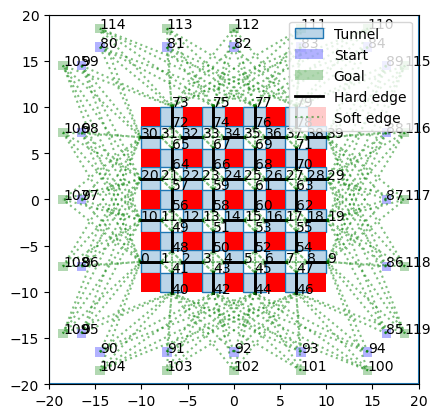

In [44]:

draw_hybrid(HG,display_soft=True)

In [38]:
sum([HG.edges[e]['type']=='soft' for e in HG.edges])

360

In [41]:
import networkx as nx
nx.shortest_path_length(HG,HG.start_nodes[0],HG.goal_nodes[0])

11

In [54]:
alg_name = 'HybridSIPP'
alg = algs[alg_name]
plans = alg(HG)

0
Solve time 0.14464092254638672
1
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
Solve time 1.0526301860809326
2
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
Solve time 1.0639941692352295
3
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.
MILP low-level encounters infeasibility.


KeyboardInterrupt: 

In [51]:
from matplotlib import pyplot as plt
from panav.viz import animation
from IPython.display import HTML, display
from matplotlib import rcParams
from panav.util import interpolate_positions

exec_tau = 0.25

rcParams['animation.embed_limit'] = 2**128
dt = exec_tau 
agents = range(len(plans))
pos_to_ani = []

for cp in plans:
    _,xs = interpolate_positions(*cp,dt)
    pos_to_ani.append(xs)
    
anim = animation(HG.env, pos_to_ani, bloating_r, dt = dt)
display(HTML(anim.to_jshtml()))
plt.close() 